---
<h1><center>Customer Segmentation Clustering</h1></center>

---

By: Jugal Shah

<h3>Overview:</h3>
In this project, unsupervised clustering of data on customer records retrieved from a groceries firm's database will be undertaken. The methodology involves customer segmentation, a practice aimed at categorizing customers into groups based on similarities within each cluster. The primary objective is to partition customers into segments to optimize their significance to the business. This segmentation approach facilitates the customization of products according to the distinct needs and behaviors of various customer segments, thus enabling the business to address the concerns of diverse customer types more effectively.

<h3>Dataset Information:</h3>

<h4>People</h4>
<u>ID:</u> Customer's unique identifier<br>
<u>Year_Birth:</u> Customer's birth year<br>
<u>Education:</u> Customer's education level<br>
<u>Marital_Status:</u> Customer's marital status<br>
<u>Income:</u> Customer's yearly household income<br>
<u>Kidhome:</u> Number of children in customer's household<br>
<u>Teenhome:</u> Number of teenagers in customer's household<br>
<u>Dt_Customer:</u> Date of customer's enrollment with the company<br>
<u>Recency:</u> Number of days since customer's last purchase<br>
<u>Complain:</u> 1 if the customer complained in the last 2 years, 0 otherwise

<h4>Products</h4>
<u>MntWines:</u> Amount spent on wine in last 2 years<br>
<u>MntFruits:</u> Amount spent on fruits in last 2 years<br>
<u>MntMeatProducts:</u> Amount spent on meat in last 2 years<br>
<u>MntFishProducts:</u> Amount spent on fish in last 2 years<br>
<u>MntSweetProducts:</u> Amount spent on sweets in last 2 years<br>
<u>MntGoldProds:</u> Amount spent on gold in last 2 years

<h4>Promotion</h4>
<u>NumDealsPurchases:</u> Number of purchases made with a discount<br>
<u>AcceptedCmp1:</u> 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
<u>AcceptedCmp2:</u> 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
<u>AcceptedCmp3:</u> 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
<u>AcceptedCmp4:</u> 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
<u>AcceptedCmp5:</u> 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
<u>Response:</u> 1 if customer accepted the offer in the last campaign, 0 otherwise

<h4>Place</h4>
<u>NumWebPurchases:</u> Number of purchases made through the company’s website<br>
<u>NumCatalogPurchases:</u> Number of purchases made using a catalogue<br>
<u>NumStorePurchases:</u> Number of purchases made directly in stores<br>
<u>NumWebVisitsMonth:</u> Number of visits to company’s website in the last month
</p>

<h2>Importing all the libraries needed for the project</h2>


In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<h2>Loading Data</h2>

In [3]:
# Importing Data
data=pd.read_csv('/Users/jugalshah/Desktop/Final_Classification_Clustering_model_sem_8/marketing_campaign.csv',sep='\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

<h2>Data Exploration</h2>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Some points to review:
<ul>
<li>Null values in Income Column. It is less then 5% so we can drop it.</li>
<li>Dt_Customer needs to be converted into datatime object.</li>
<li>Numerical encoding of some catergorical variables of object type needs to be done.</li>
</ul>

In [93]:
data.describe(include='all')

ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      Recency     MntWines  ...  \
count   2240.000000  2240.000000        2240  2240.000000  2240.000000  ...   
unique          NaN          NaN         663          NaN          NaN  ...   
top             NaN          NaN  31-08-2012          NaN          NaN  ...   
freq            NaN          NaN          12          NaN          NaN  ...   
mean       0.444196     0.506250         NaN    49.109375   303.935714  ...   
std        0.538398     0.544538         NaN    28.962453   336.597393  ...   
min        0.000000     0.000000         NaN     0.000000     0.000000  ...   
25%        0.000000     0.000000         NaN    24.000000    23.750000  ...   
50%        0.000000     0.000000         NaN    49.000000   173.500000  ...   
75%        1.000000     1.000000         NaN    74.000000   504.250000  ...   
max        2.000000     2.000000         NaN    99.000000  1493.000000  ...   

        NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count         2240.000000   2240.000000   2240.000000   2240.000000   
unique                NaN           NaN           NaN           NaN   
top                   NaN           NaN           NaN           NaN   
freq                  NaN           NaN           NaN           NaN   
mean             5.316518      0.072768      0.074554      0.072768   
std              2.426645      0.259813      0.262728      0.259813   
min              0.000000      0.000000      0.000000      0.000000   
25%              3.000000      0.000000      0.000000      0.000000   
50%              6.000000      0.000000      0.000000      0.000000   
75%              7.000000      0.000000      0.000000      0.000000   
max             20.000000      1.000000      1.000000      1.000000   

        AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count    2240.000000   2240.000000  2240.000000         2240.0     2240.0   
unique           NaN           NaN          NaN            NaN        NaN   
top              NaN           NaN          NaN            NaN        NaN   
freq             NaN           NaN          NaN            NaN        NaN   
mean        0.064286      0.013393     0.009375            3.0       11.0   
std         0.245316      0.114976     0.096391            0.0        0.0   
min         0.000000      0.000000     0.000000            3.0       11.0   
25%         0.000000      0.000000     0.000000            3.0       11.0   
50%         0.000000      0.000000     0.000000            3.0       11.0   
75%         0.000000      0.000000     0.000000            3.0       11.0   
max         1.000000      1.000000     1.000000            3.0       11.0   

           Response  
count   2240.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.149107  
std        0.356274  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[11 rows x 29 columns]

<h2>Data Cleaning</h2>

In [5]:
# Removing null values
data = data.dropna()
print("Remaining Records Count:", len(data))

Remaining Records Count: 2216


In [6]:
# Dealing with Dt_Customer column
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],format='mixed')
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [96]:
print(data['Dt_Customer'])

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]


In [7]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [9]:
# Find the categories in Maritial_Status and Education
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


# Converting Categorical Values to numerical values for feature selection

In [10]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [101]:
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [102]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

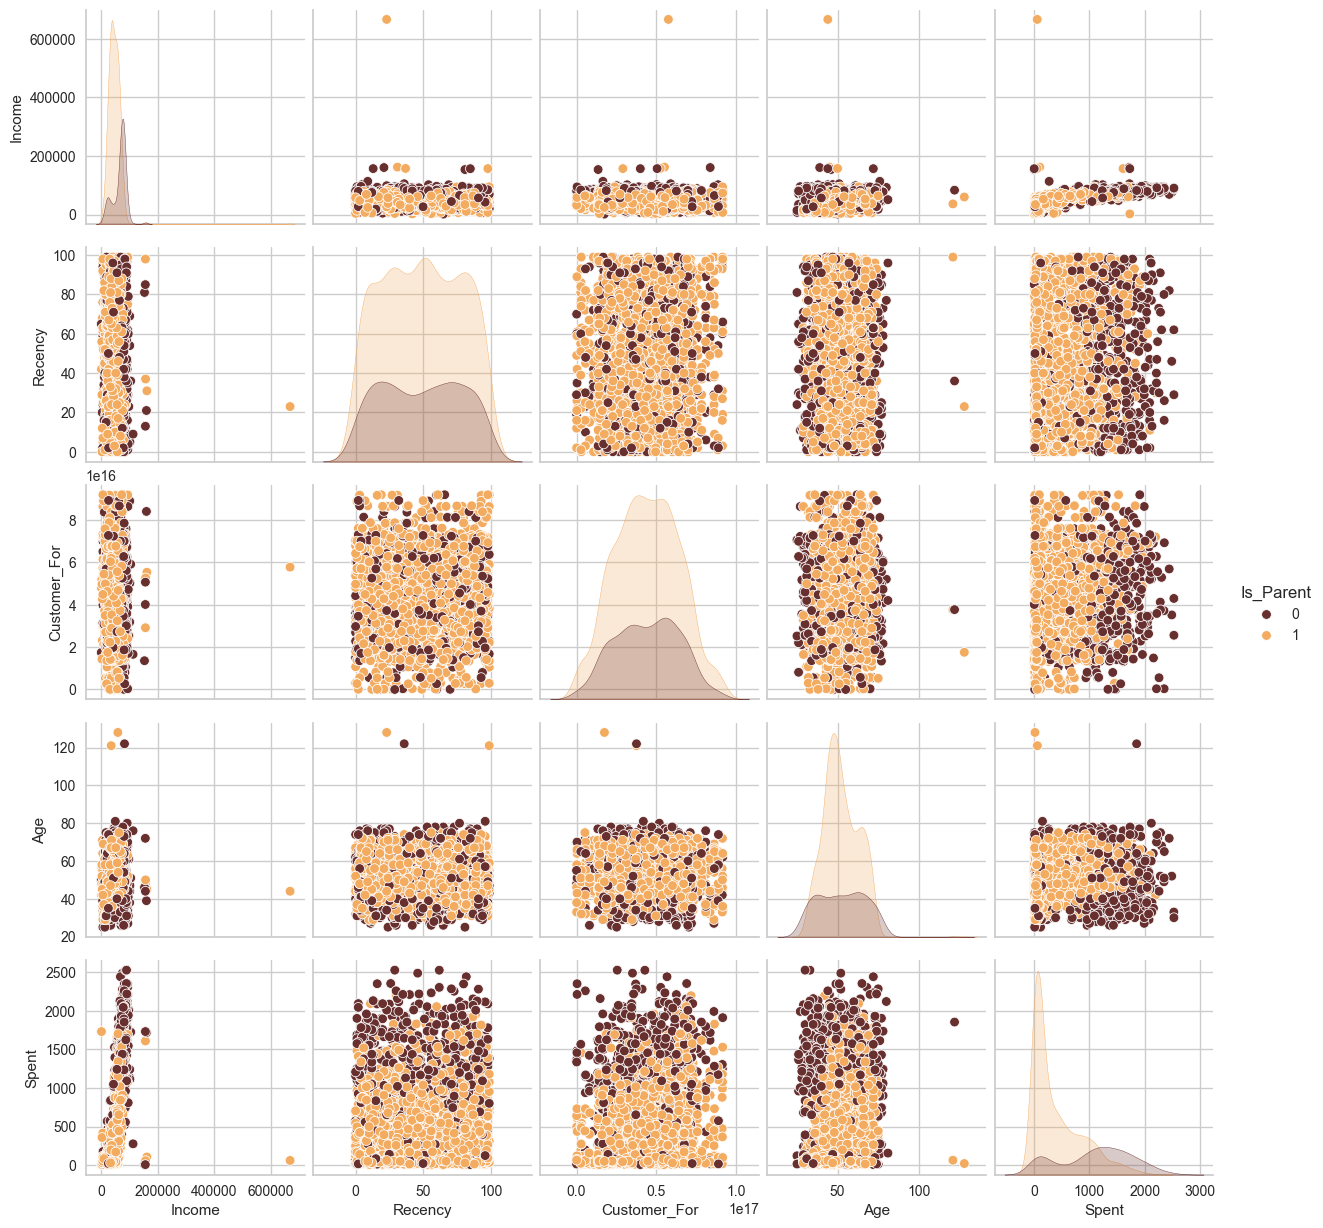

In [103]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",diag_kind='auto',palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

Clearly, there are a few outliers in the Income and Age features. 
We need to deal with these outliers in the data. 

In [11]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]< 90)]
data = data[(data["Income"]<600000)]
print("Remaining Records Count:", len(data))

Remaining Records Count: 2212


In [12]:
# Setting a common theme for the charts
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [107]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For  \
0   172      88  ...             0         0         1  83894400000000000   
1     2       1  ...             0         0         0  10800000000000000   
2   111      21  ...             0         0         0  40780800000000000   
3    10       3  ...             0         0         0   5616000000000000   
4    46      27  ...             0         0         0  27734400000000000   

   Age  Spent  Living_With  Children  Family_Size  Is_Parent  
0   64   1617        Alone         0            1          0  
1   67     27        Alone         2            3          1  
2   56    776      Partner         0            2          0  
3   37     53      Partner         1            3          1  
4   40    422      Partner         1            3          1  

[5 rows x 30 columns]

<h2>Data Preprocessing</h2>

In [13]:
# Numerical Encoding of Categorical variables
# There are two categorical features 'Education' and 'Living_With' which we need to deal with.
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in ['Education', 'Living_With']:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


<Axes: >

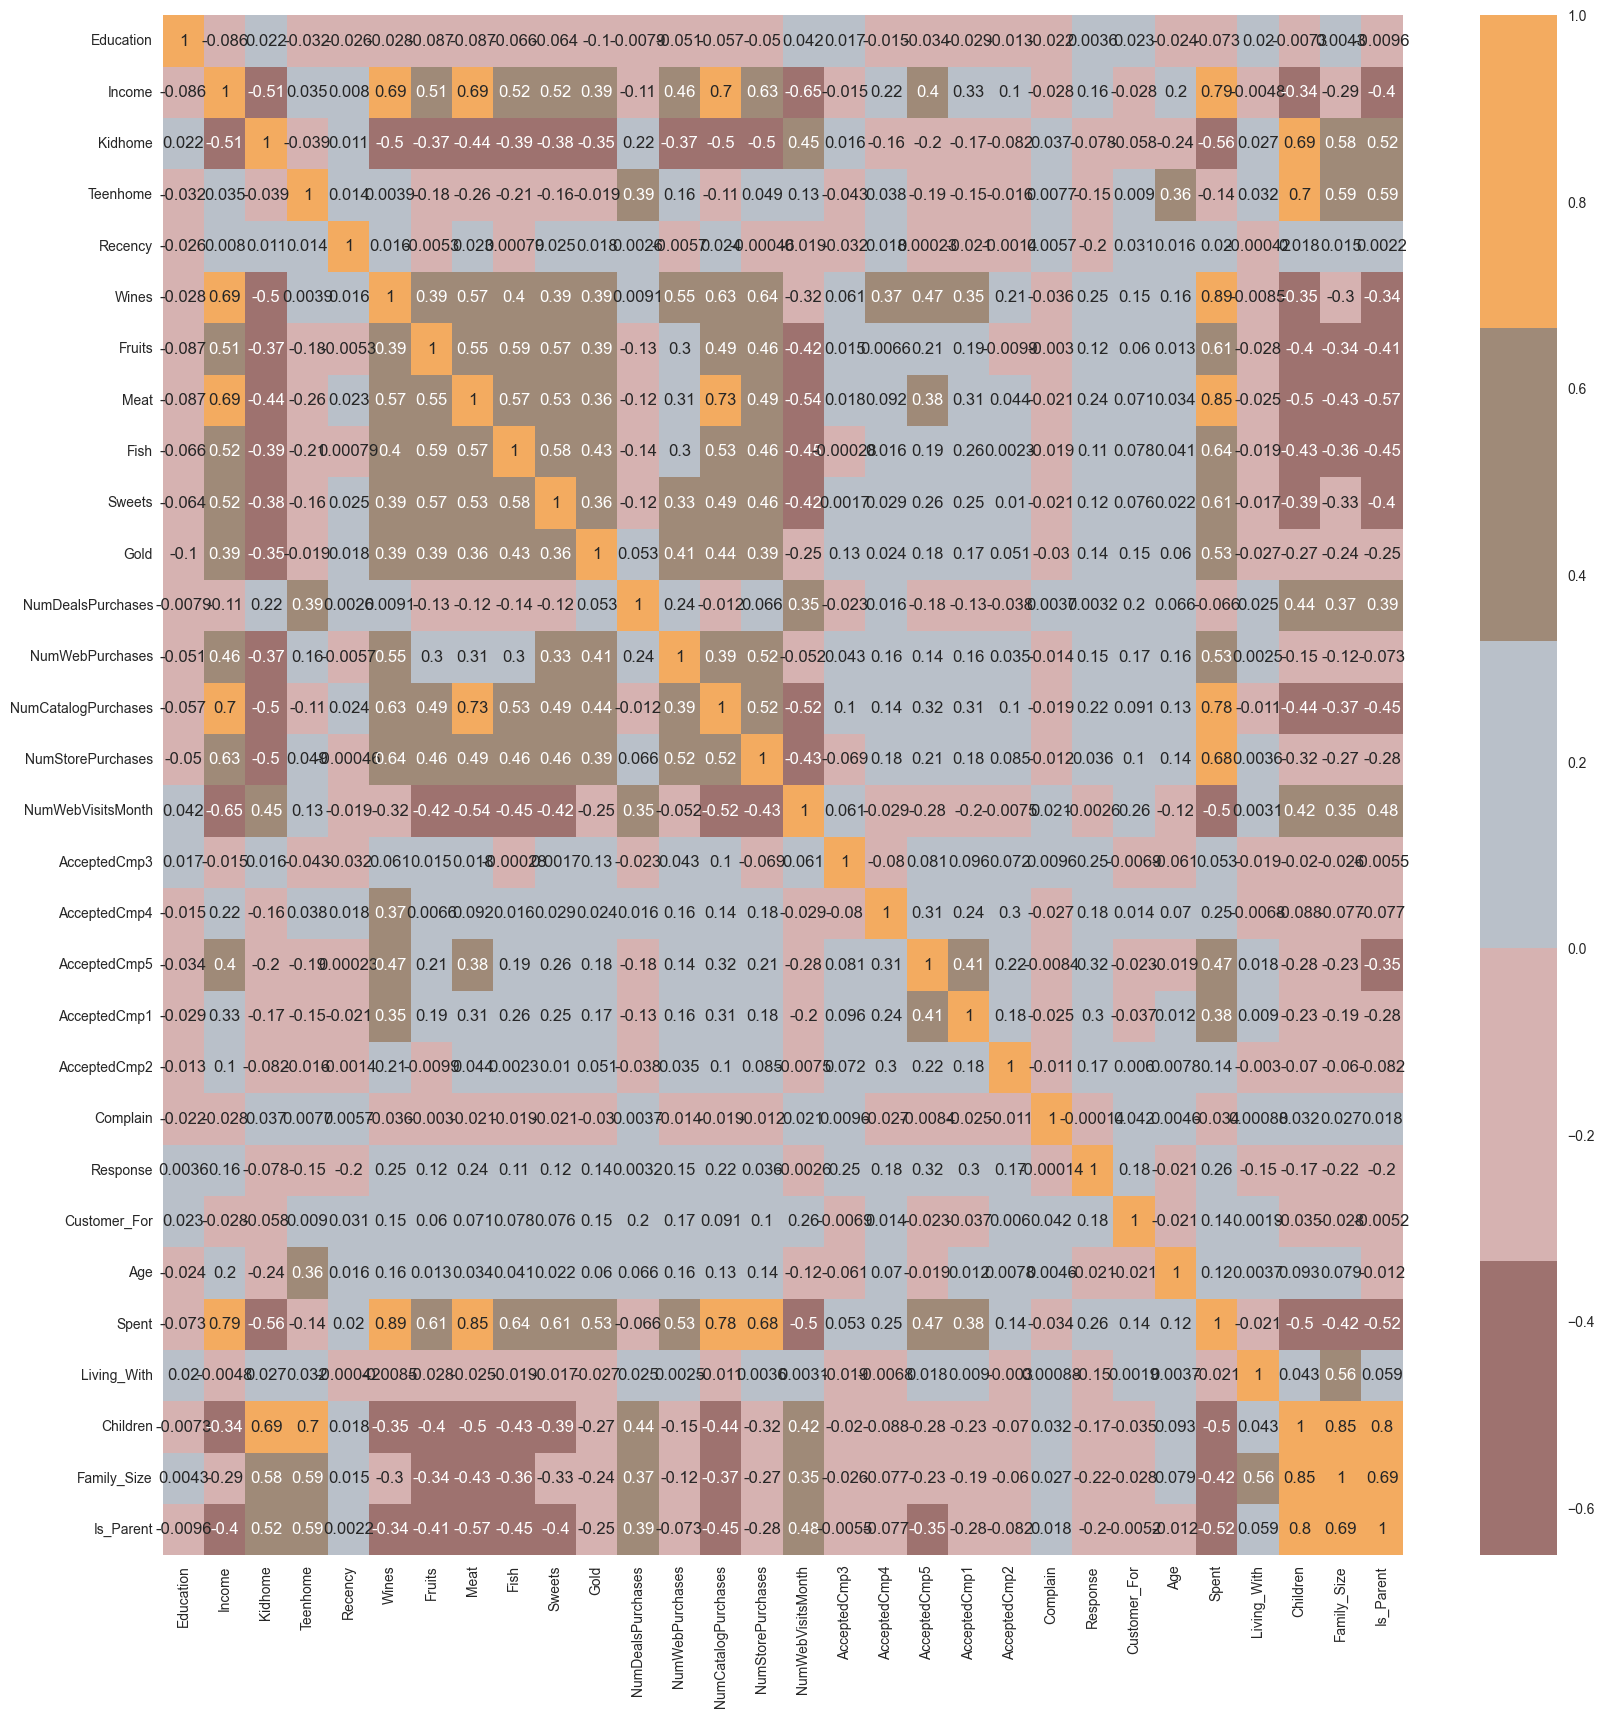

In [52]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

# Scaling Data

In [14]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


# Reviewing the Scaled Dataset

In [16]:
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.973583  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.665144  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.172664  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.923210 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.822130 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

<h2>Dimensionality Reduction</h2>

Here we will use 'Principal component analysis (PCA)' which is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.


In [110]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T
#pca.explained_variance_ratio_*100

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -1.670354e-16  2.878377 -5.969394 -2.538494 -0.780421  2.383290   
col2  2212.0 -5.781993e-17  1.706839 -4.312196 -1.328316 -0.158123  1.242289   
col3  2212.0  6.585048e-17  1.221956 -3.530416 -0.829067 -0.022692  0.799895   

           max  
col1  7.444305  
col2  6.142721  
col3  6.611222

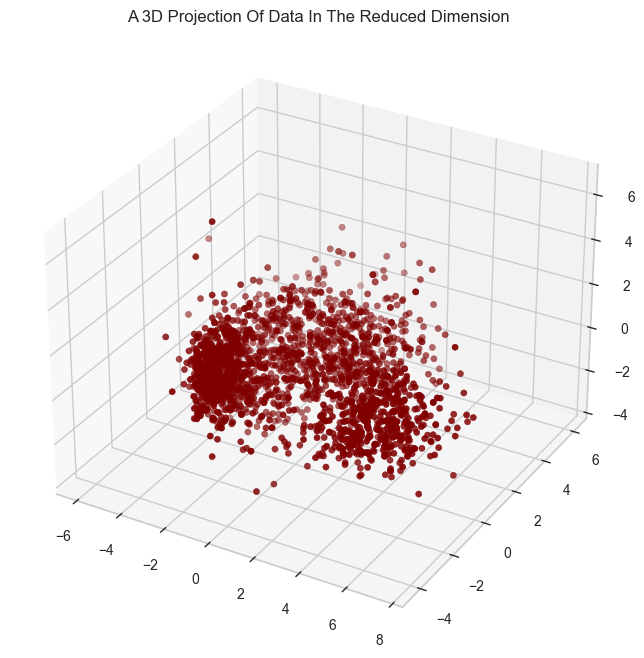

In [22]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [111]:
PCA_ds

col1      col2      col3
0     4.994347 -0.151236  2.648081
1    -2.884455 -0.006671 -1.863867
2     2.617864 -0.720757 -0.252088
3    -2.676036 -1.541970 -0.922537
4    -0.649591  0.209831 -0.021196
...        ...       ...       ...
2207  2.321341  2.436323  0.520721
2208 -3.105957  4.020986 -1.499033
2209  2.673666 -1.869183  0.592662
2210  1.494055  1.701859 -1.626902
2211 -2.742613  1.650313 -0.283786

[2212 rows x 3 columns]

<h2>Clustering<h2>

Elbow Method to determine the number of clusters to be formed:


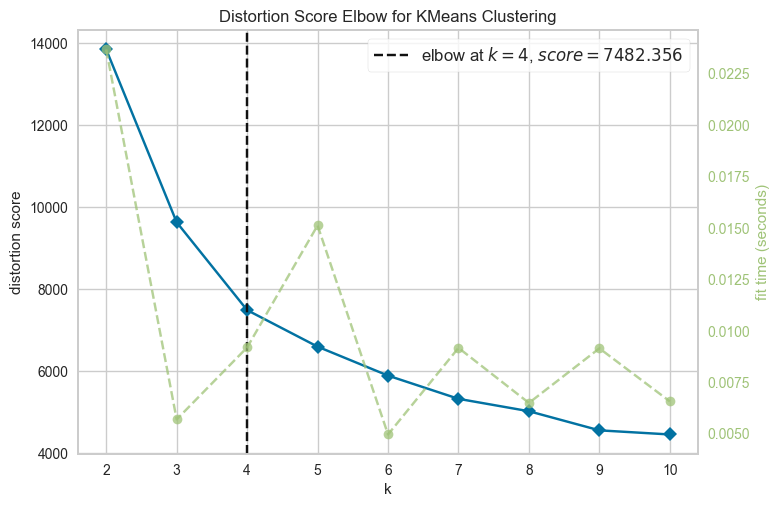

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [113]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

In [114]:
data['Clusters']

0       1
1       3
2       1
3       2
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: Clusters, Length: 2212, dtype: int64

In [29]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  Complain  Response       Customer_For  Age  Spent  \
0      88  ...         0         1  83894400000000000   64   1617   
1       1  ...         0         0  10800000000000000   67     27   
2      21  ...         0         0  40780800000000000   56    776   
3       3  ...         0         0   5616000000000000   37     53   
4      27  ...         0         0  27734400000000000   40    422   

   Living_With  Children  Family_Size  Is_Parent  Clusters  
0            0         0            1          0         2  
1            0         2            3          1         1  
2            1         0            2          0         2  
3            1         1            3          1         0  
4            1         1            3          1         1  

[5 rows x 31 columns]

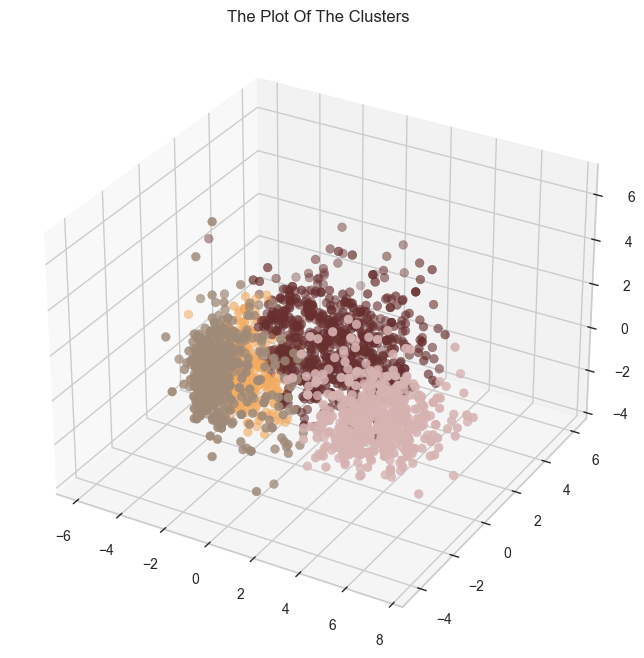

In [23]:
#Plotting the clusters
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40 ,c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Personality Analysis

<Figure size 800x550 with 0 Axes>

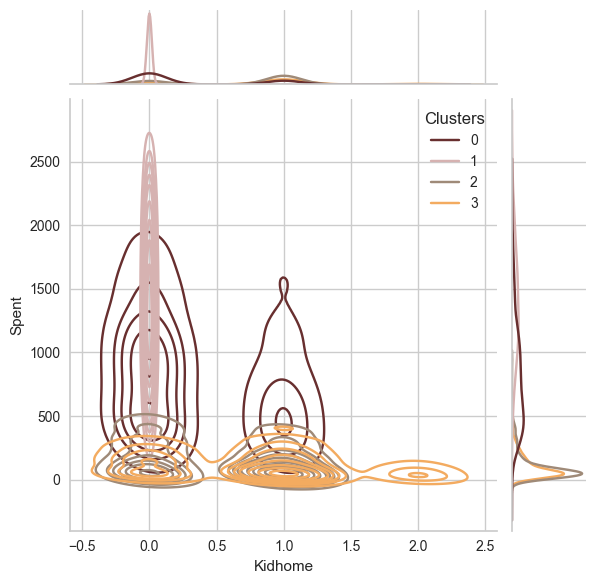

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

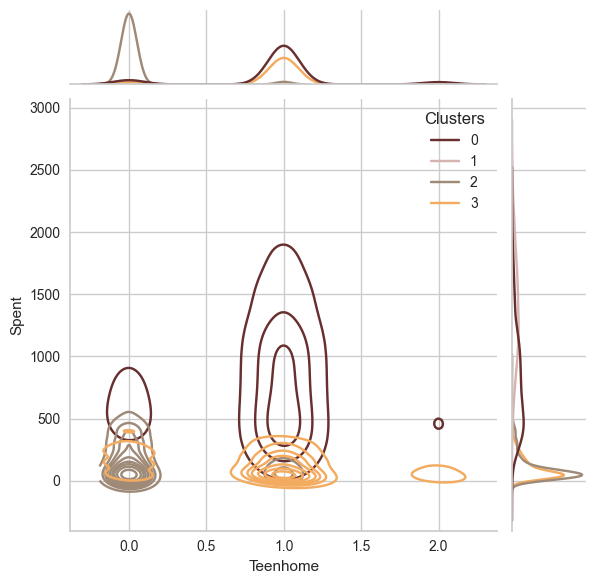

<Figure size 800x550 with 0 Axes>

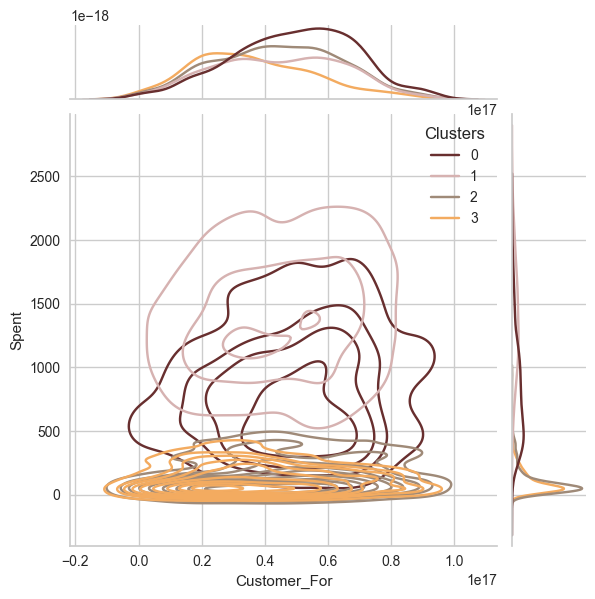

<Figure size 800x550 with 0 Axes>

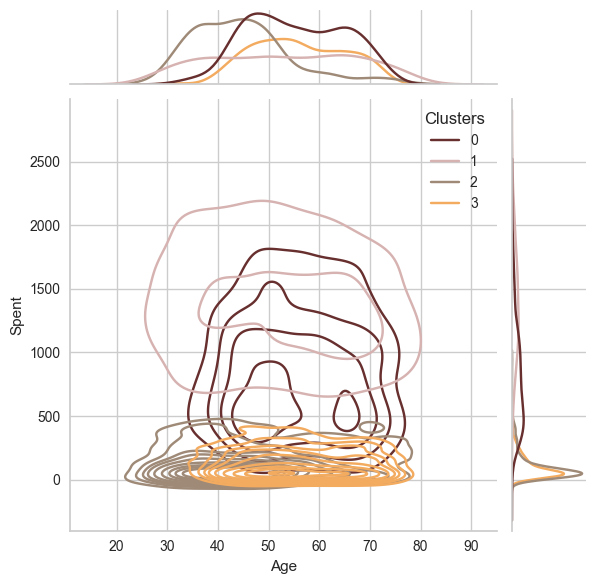

<Figure size 800x550 with 0 Axes>

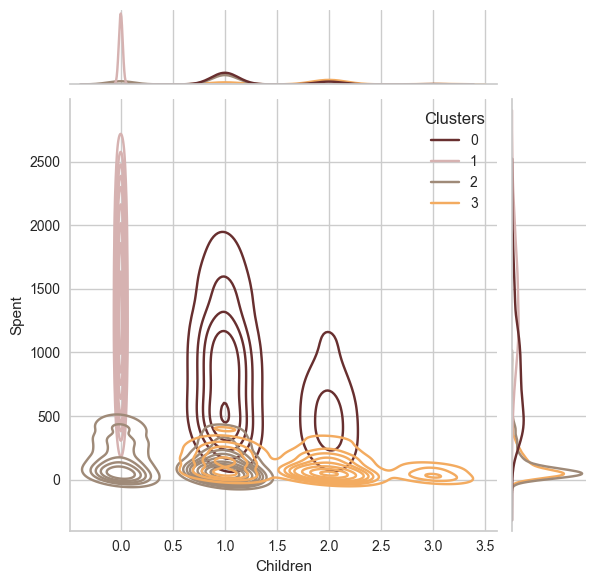

<Figure size 800x550 with 0 Axes>

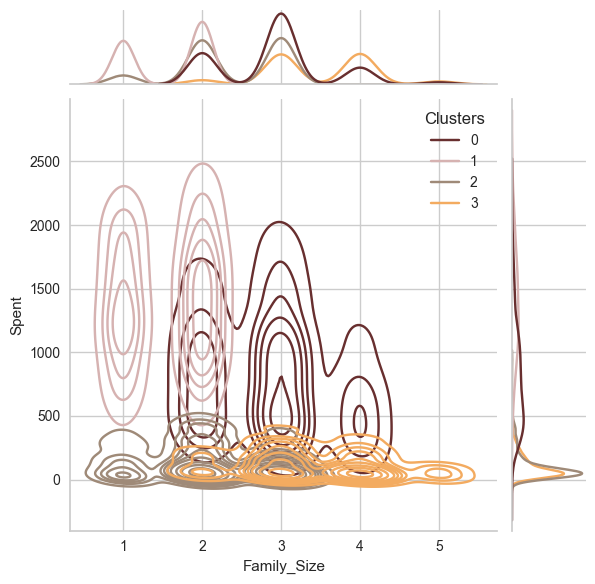

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

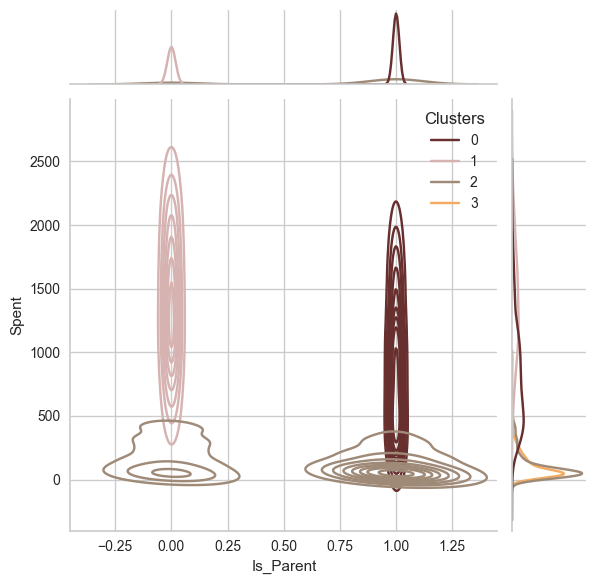

<Figure size 800x550 with 0 Axes>

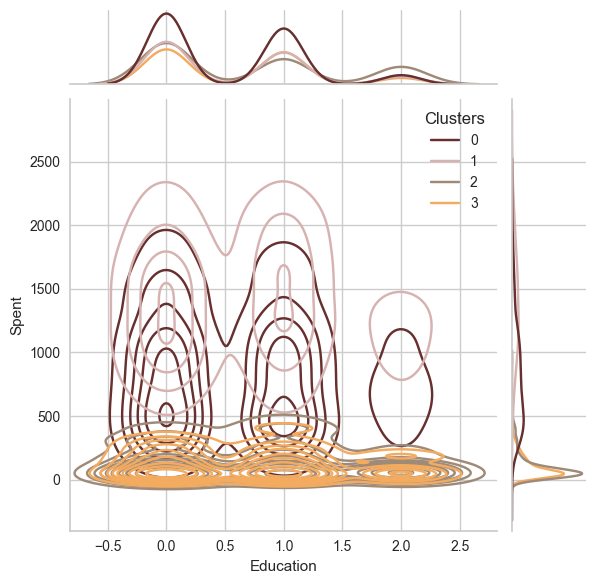

<Figure size 800x550 with 0 Axes>

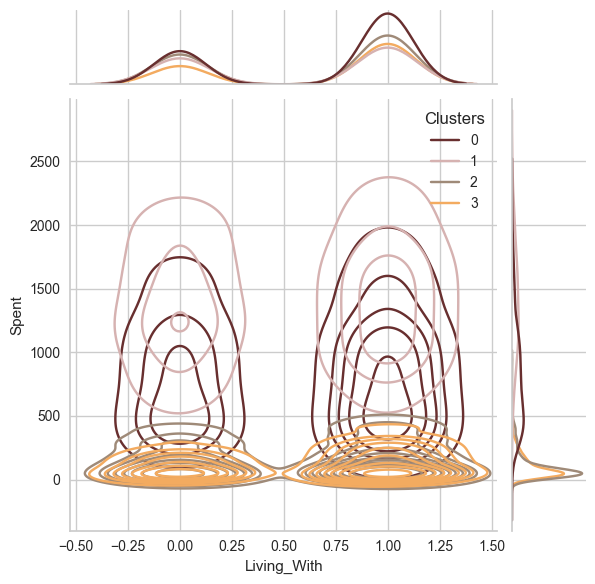

In [62]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind='kde', palette=cmap)
    plt.show()

/var/folders/fd/rstfwcm13nv1gw51klvpvshh0000gn/T/ipykernel_31581/3493433691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"],palette= pal)


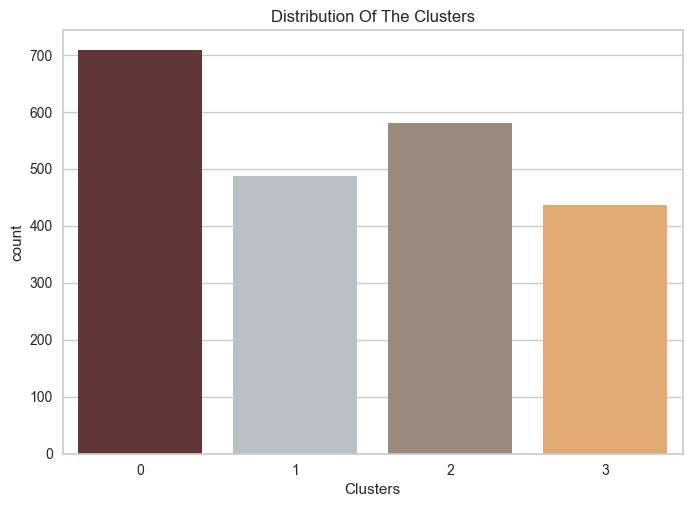

In [65]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"],palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# Understanding the Income Range and Amount Spent in the dataset

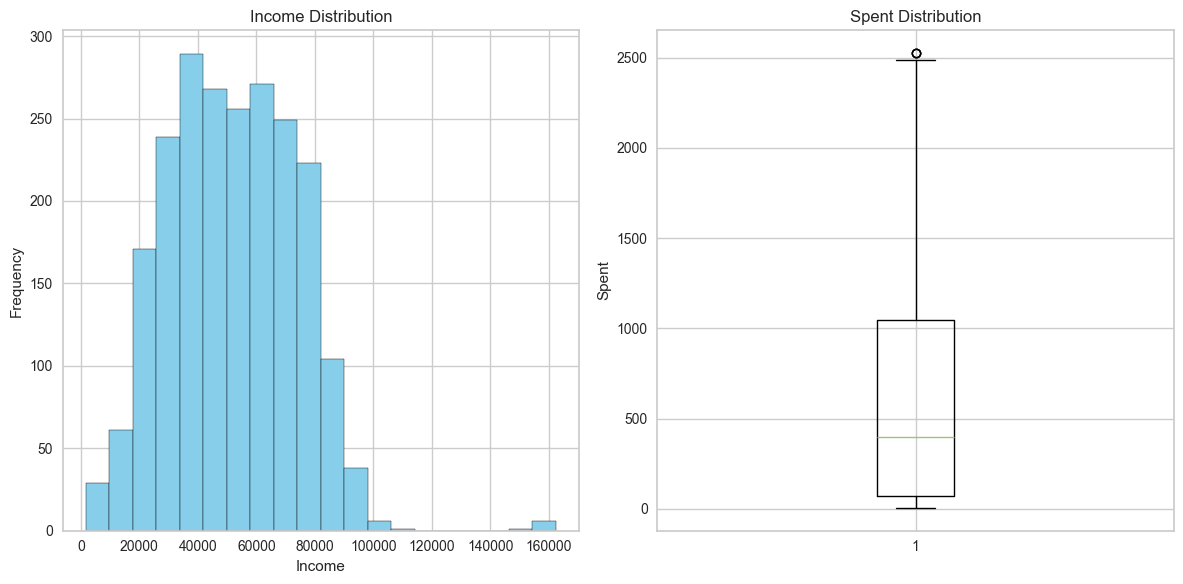

In [19]:
data['Spent_zscore'] = (data['Spent'] - data['Spent'].mean()) / data['Spent'].std()
outliers_threshold = 3
outliers = data[abs(data['Spent_zscore']) > outliers_threshold]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(data['Spent'])
plt.title('Spent Distribution')
plt.ylabel('Spent')
plt.tight_layout()
plt.show()

# Income and Spent Distribution Distribution Insights:

The income distribution is skewed towards the lower end, with a significant concentration of data points in the 60,000 to 80,000 range. This suggests that a large portion of the population or sample earns within this income bracket.
The frequency of higher incomes decreases as the income value increases, indicating fewer people earn significantly higher incomes. This is typical of many real-world income distributions, reflecting economic inequality where the majority of the population earns a moderate income while a smaller fraction earns very high incomes.
Spent Distribution Insights:

The box plot for spending shows that the median spending is around the middle of the range, with a fairly symmetrical distribution of spending around the median. This suggests that the typical spending behavior does not vary dramatically from the median.
The presence of an outlier in the spending data indicates that there is at least one individual or data point with significantly higher spending compared to the rest. This could represent an anomaly or could be indicative of a segment of the population that engages in much higher levels of consumption.
Comparative Insights:

Comparing the two plots, it's evident that while income has a wide distribution and is skewed towards lower values, spending is more tightly clustered around the median. This could suggest that regardless of income variations, spending behaviors among the population or sample tend to be more uniform.
The analysis of both income and spending distributions can be crucial for understanding economic behaviors, planning marketing strategies, or for socio-economic research.

The clusters seem to be fairly distributed.

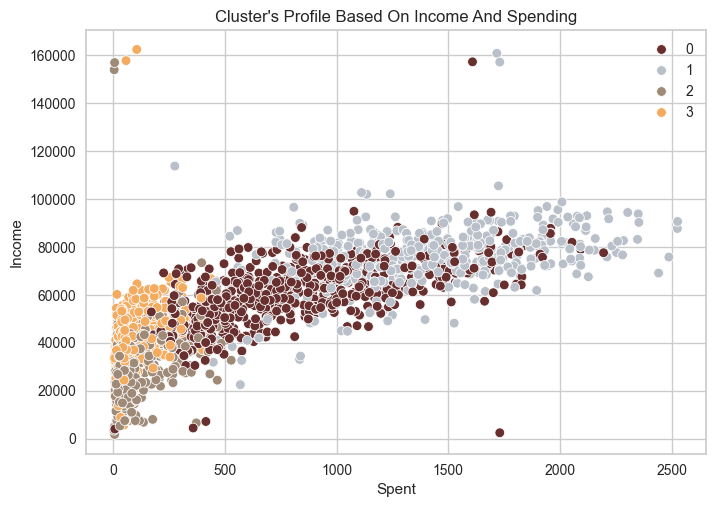

In [66]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs  spending plot shows the clusters pattern**
* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income 
* group 3: high spending & low income  

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

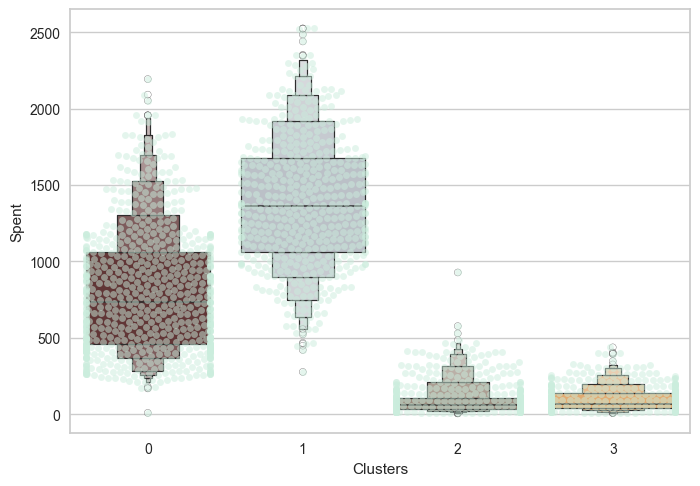

In [69]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()


From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0.
We can explore what each cluster is spending on for the targeted marketing strategies.


Let us next explore how did our campaigns do in the past.

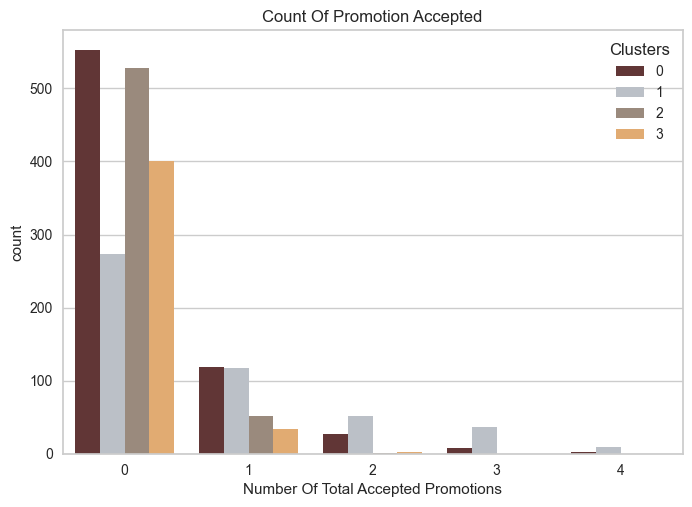

In [70]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales. 


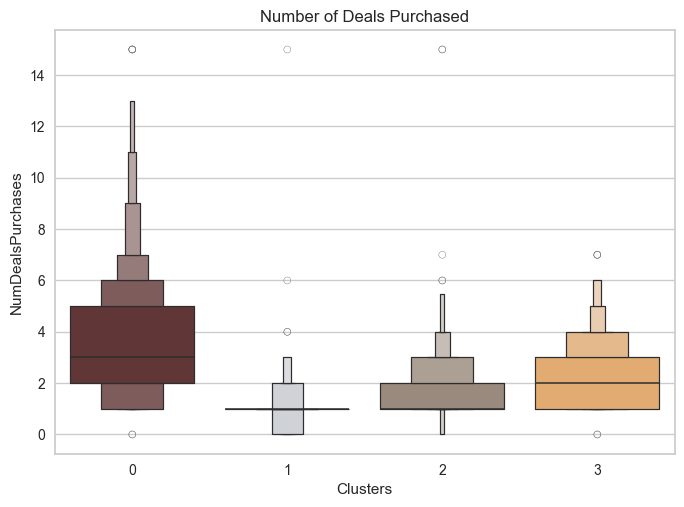

In [71]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. 
However, our star customers cluster 1 are not much into the deals. 
Nothing seems to attract cluster 2 overwhelmingly 


<Figure size 800x550 with 0 Axes>

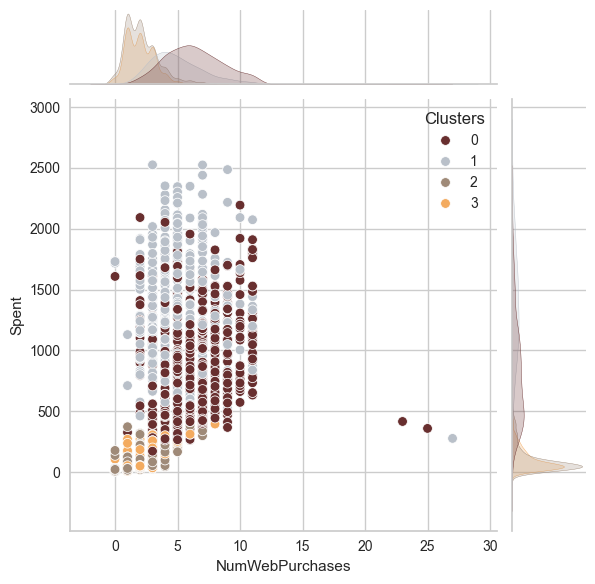

<Figure size 800x550 with 0 Axes>

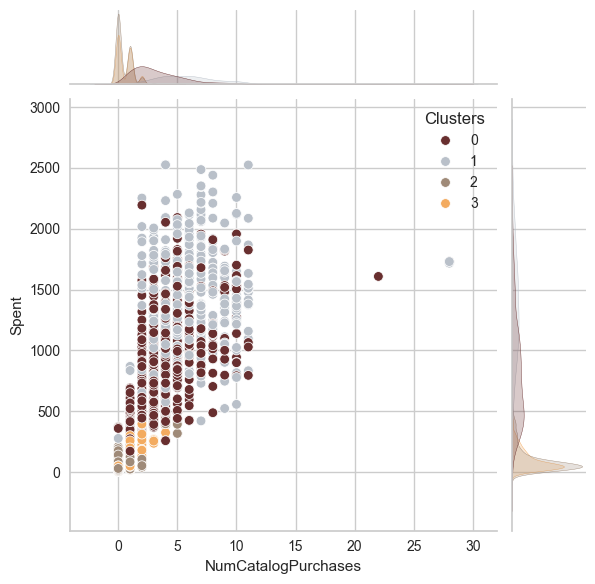

<Figure size 800x550 with 0 Axes>

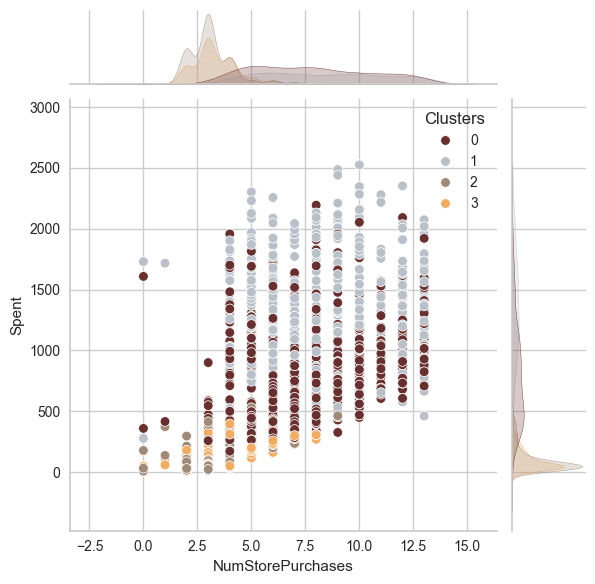

<Figure size 800x550 with 0 Axes>

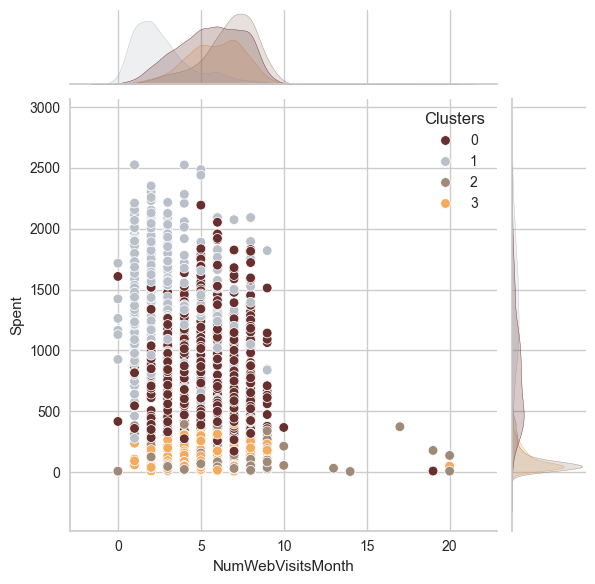

In [72]:
#for more details on the purchasing style 
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["Spent"],hue=data["Clusters"], palette= pal)
    plt.show()

# Cluster Analysis  

<h>Cluster 0:
- Definitely a parent
- At max have 4 and at least 2 members in family
- Single parents are a subset of this group
- Most of them have a teenager at home
- They are relatively older

Cluster 1:
- Definitely not a parent
- At max there are only 2 members in the family
- A slight majority of couples over singles
- Span all ages
- A high income group

Cluster 2:
- The majority of these people are parents
- At the max there are 3 members in the family
- They majorly have one kid (and not teenagers, typically)
- They are relatively younger

Cluster 3:
- They are definitely a parent
- At max have 5 and at least 2 members in the family
- Majority have a teenager at home
- They are relatively older
-  A low-income group</h>

# Additional Information

# CLUSTER 0
<p>The customers belonging to the cluster 0, are definetly a parent.
 They have at max 4 children and at least 2 members in the family. 
 Most of them have a teenager at home. 
 They are relatively older , typically lie between age group of mid 30's and early late 70's. </p>

 # Cluster 1
 <p> Individuals lying in this cluster are not parents, at max there are only 2 members in the family. A slight majority of individuals lying in this cluster are couples while the rest are single. Broadly the individuals lying in this category span all age groups. The individuals lying in these category belong to high-income group.</p>

# Cluster 2
<p>Majority of them are parents, at max there 3 members in the family. At max there is only one kid and most of them don't have a teenager. They belong to low income group and they spent less while purchasing, and they are relatively younger.</p>

# General Analysis

Text(0.5, 1.0, 'Income Analysis')

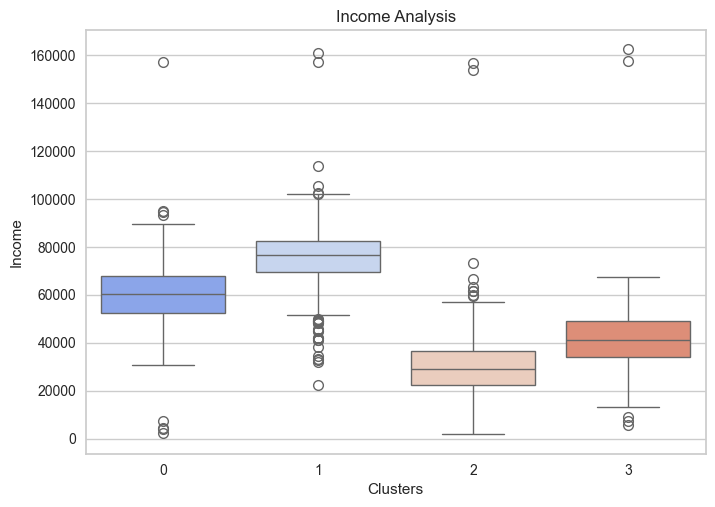

In [170]:
sns.boxplot(data=data,x='Clusters',y='Income',palette='coolwarm')
plt.title('Income Analysis')

Text(0.5, 1.0, 'Analysis to identify spent amount across each cluster')

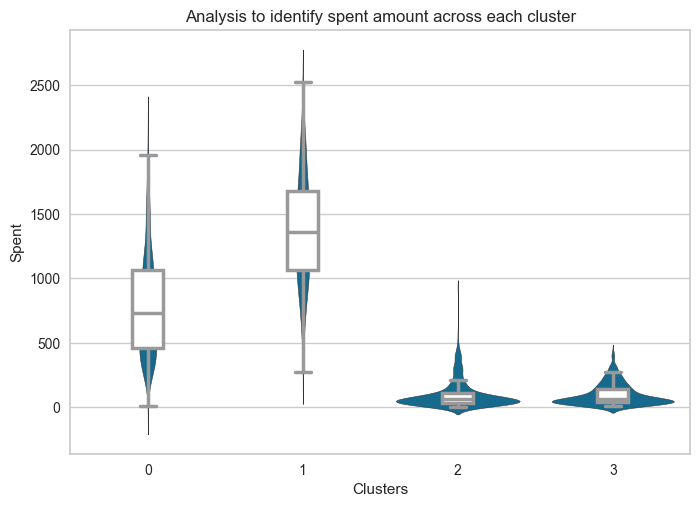

In [171]:
sns.violinplot(data=data,x='Clusters',y='Spent')
sns.boxplot(x='Clusters', y='Spent', data=data, width=0.2, linewidth=2.5, color='white', showfliers=False)
plt.title('Analysis to identify spent amount across each cluster')

#### FUTURE COURSE OF ACTION

# For Cluster 0:
for the given cluster they tend to spend

In [164]:
import pandas as pd
import scipy 
from scipy import stats as st
# Assuming 'data' is a pandas DataFrame
median_income = data.loc[data['Clusters'] ==0,'Income'].median()
min_income = data.loc[data['Clusters'] ==0,'Income'].min()
mean_income = data.loc[data['Clusters']==0,'Income'].mean()
max_income = data.loc[data['Clusters']==0,'Income'].max()
mode_income = st.mode(data.loc[data['Clusters']==0,'Income'])
print(median_income)
print(min_income)
print(mean_income)
print(max_income)

60474.0
2447.0
60052.556497175145
157243.0


# Income Analysis For Cluster 0

In [165]:
mask = (data['Clusters']==0)
check = data.loc[mask,'Income']
Q1=check.quantile(0.25)
Q2=check.quantile(0.75)
print('Lower Quartile', Q1)
print('Upper Quartile:',Q2)
IQR = Q1-Q2
lw =  check.min() - 1.5 * IQR
up =  check.max() +  1.5 * IQR
print('Lower whisker value:', lw)
print('Upper whisker value:', up)

Lower Quartile 52379.25
Upper Quartile: 67760.25
Lower whisker value: 25518.5
Upper whisker value: 134171.5


# Amount Spent Analysis

In [167]:
import scipy
from scipy import stats as st
spent_usually = data.loc[data['Clusters']==1,'Spent'].value_counts()
print('Maximum Occuring frequency for various spent amounts:',max(spent_usually))
print('the maximum value with maximum frequency:',max(spent_usually.index))
print('the minimum value with maximum frequency:',min(spent_usually.index))
print('The median value of spent amount',np.median(data.loc[data['Clusters']==1, 'Spent']))
print('The mean value of spent amount',np.mean(data.loc[data['Clusters']==1,'Spent']))
print('The mode value of spent amount',st.mode(data.loc[data['Clusters']==1,'Spent']))

Maximum Occuring frequency for various spent amounts: 4
the maximum value with maximum frequency: 2525
the minimum value with maximum frequency: 277
The median value of spent amount 1364.0
The mean value of spent amount 1385.0164271047229
The mode value of spent amount ModeResult(mode=1033, count=4)


# Customer Recency Analysis

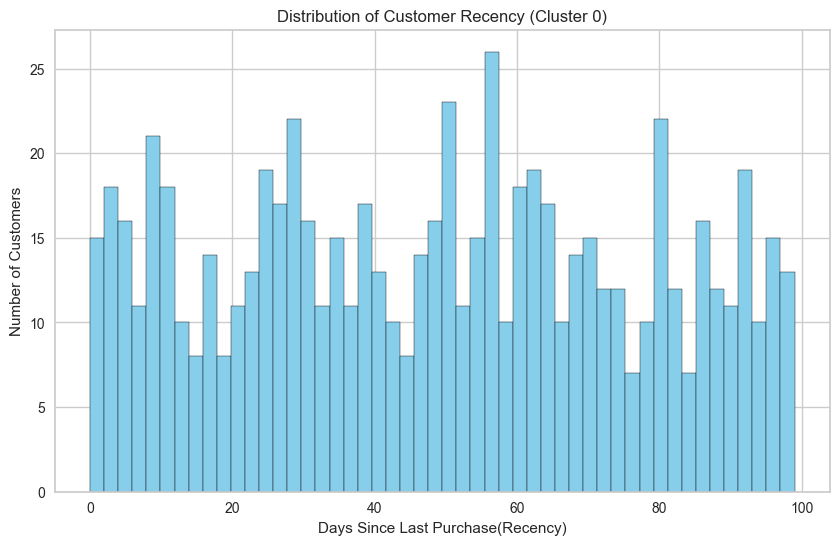

In [169]:
# sns.barplot(x=data['Recency'],hue=data['Clusters'])
import matplotlib.pyplot as plt
mask = data[data['Clusters']==0 & data['Recency']]
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(mask['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Recency (Cluster 0)')
plt.xlabel('Days Since Last Purchase(Recency)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

The histogram shows that the greatest number of customers in Cluster 0 made a purchase between 0 and 20 days ago.  There is a general downward trend as the days since purchase increases. This means that there are fewer and fewer customers who made a purchase the further out you go on the x-axis.

In other words, recency in Cluster 0 is right-skewed. This means that most customers in the cluster have purchased recently (within 0-20 days).

#### FUTURE COURSE OF ACTION

# For Cluster 1:
for the given cluster they tend to spend

In [42]:
import pandas as pd
import scipy 
from scipy import stats as st
# Assuming 'data' is a pandas DataFrame
median_income = data.loc[data['Clusters'] ==1,'Income'].median()
min_income = data.loc[data['Clusters'] ==1,'Income'].min()
mean_income = data.loc[data['Clusters']==1,'Income'].mean()
max_income = data.loc[data['Clusters']==1,'Income'].max()
mode_income = st.mode(data.loc[data['Clusters']==1,'Income'])
print(median_income)
print(min_income)
print(mean_income)
print(max_income)

76542.0
22507.0
75714.74332648871
160803.0


In [64]:
mask = (data['Clusters']==1)
check = data.loc[mask,'Income']
Q1=check.quantile(0.25)
Q2=check.quantile(0.75)
print('Lower Quartile', Q1)
print('Upper Quartile:',Q2)
IQR = Q1-Q2
lw =  check.min() - 1.5 * IQR
up =  check.max() +  1.5 * IQR
print('Lower whisker value:', lw)
print('Upper whisker value:', up)

Lower Quartile 69498.0
Upper Quartile: 82500.5
Lower whisker value: 42010.75
Upper whisker value: 141299.25


# Amount Spent Analysis

In [49]:
import scipy
from scipy import stats as st
spent_usually = data.loc[data['Clusters']==1,'Spent'].value_counts()
print(spent_usually)
print('Maximum Occuring frequency for various spent amounts:',max(spent_usually))
print('the maximum value with maximum frequency:',max(spent_usually.index))
print('the minimum value with maximum frequency:',min(spent_usually.index))
print('The median value of spent amount',np.median(data.loc[data['Clusters']==1, 'Spent']))
print('The mean value of spent amount',np.mean(data.loc[data['Clusters']==1,'Spent']))
print('The mode value of spent amount',st.mode(data.loc[data['Clusters']==1,'Spent']))

Spent
1033    4
1149    4
1366    4
1574    4
981     3
       ..
2018    1
1226    1
421     1
1345    1
1241    1
Name: count, Length: 388, dtype: int64
Maximum Occuring frequency for various spent amounts: 4
the maximum value with maximum frequency: 2525
the minimum value with maximum frequency: 277
The median value of spent amount 1364.0
The mean value of spent amount 1385.0164271047229
The mode value of spent amount ModeResult(mode=1033, count=4)


In [79]:
A = data.loc[data['Clusters']==1,'Spent']
Q1 =  A.quantile(0.25)
Q2 =  A.quantile(0.75)
print('Lower Quartile value:',Q1, end = '\n')
print('Upper Quartile Value :', Q2)
IQR = Q2 - Q1
print("Interquartile Range (IQR):", IQR)

Lower Quartile value: 1062.0
Upper Quartile Value : 1676.5
Interquartile Range (IQR): 614.5


# Income vs Spent Analysis

In [129]:
mask = (data['Clusters'] == 1) & (data['Income'] <= 82500.5) & (data['Income'] >= 69498)
spent_mask = (data['Clusters']==1) & (data['Spent']>=1062) & (data['Spent'] <= 1676.5 )
# sns.histplot(data=data,x=data['mask'],y=data['spent_mask'])

filtered_data = data[mask  & spent_mask]

# # Calculate Spent as a percentage of Income on filtered data
filtered_data['Spent_as_pct_of_Income'] = (filtered_data['Spent'] / filtered_data['Income']) * 100
print('On Average they tend to spend about 1.78 percent of their income:',np.mean(filtered_data['Spent_as_pct_of_Income']))




On Average they tend to spend about 1.78 percent of their income: 1.7846462806672678


# Customer Recency Analysis

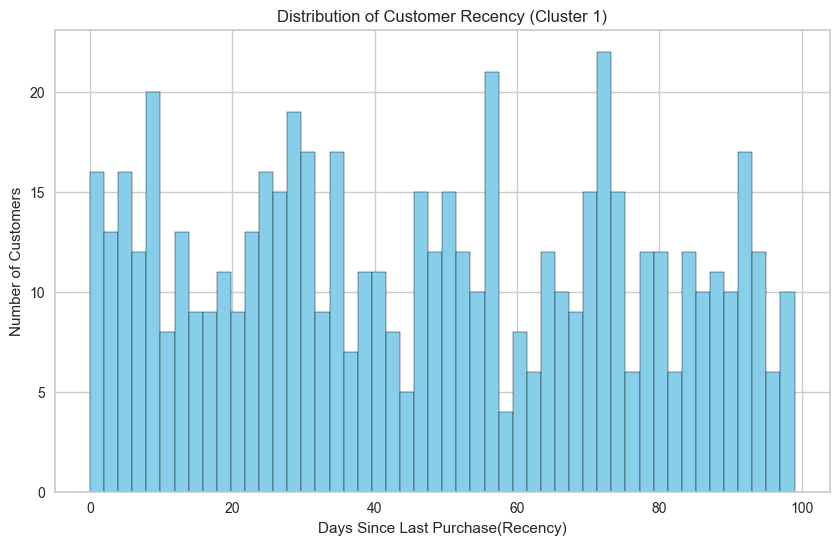

In [147]:
# sns.barplot(x=data['Recency'],hue=data['Clusters'])
import matplotlib.pyplot as plt
mask = data[data['Clusters']==1 & data['Recency']]
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(mask['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Recency (Cluster 1)')
plt.xlabel('Days Since Last Purchase(Recency)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

The graph shows a distribution of the number of days since the last purchase (recency) for customers in cluster 1. The x-axis represents the number of days since the last purchase, and the y-axis represents the number of customers in each bin. By looking at the graph, you can see how many customers in cluster 1 made a purchase in the last 0-30 days, 31-60 days, and so on. The shape of the distribution can tell you things about the recency behavior of customers in cluster 1. For example, a graph with a peak at the beginning (lower recency values) suggests that most customers in cluster 1 tend to make repeat purchases soon after their initial purchase.

#### FUTURE COURSE OF ACTION

# For Cluster 2:
for the given cluster they tend to spend

# Income Analysis for Cluster 2

In [148]:
import pandas as pd
import scipy 
from scipy import stats as st
# Assuming 'data' is a pandas DataFrame
median_income = data.loc[data['Clusters'] ==2,'Income'].median()
min_income = data.loc[data['Clusters'] ==2,'Income'].min()
mean_income = data.loc[data['Clusters']==2,'Income'].mean()
max_income = data.loc[data['Clusters']==2,'Income'].max()
mode_income = st.mode(data.loc[data['Clusters']==2,'Income'])
print(median_income)
print(min_income)
print(mean_income)
print(max_income)

29211.5
1730.0
29956.56551724138
156924.0


In [149]:
mask = (data['Clusters']==2)
check = data.loc[mask,'Income']
Q1=check.quantile(0.25)
Q2=check.quantile(0.75)
print('Lower Quartile', Q1)
print('Upper Quartile:',Q2)
IQR = Q1-Q2
lw =  check.min() - 1.5 * IQR
up =  check.max() +  1.5 * IQR
print('Lower whisker value:', lw)
print('Upper whisker value:', up)

Lower Quartile 22374.25
Upper Quartile: 36692.5
Lower whisker value: 23207.375
Upper whisker value: 135446.625


#### From above given Income Analysis chart and above mentioned analysis, we can say that majority of customers lying in cluster 2 have an income ranging from 22374 to 36692.5

# Amount Spent Analysis

In [154]:
import scipy
from scipy import stats as st
spent_usually = data.loc[data['Clusters']==2,'Spent'].value_counts()
print('Maximum Occuring frequency for various spent amounts:',max(spent_usually))
print('the maximum value with maximum frequency:',max(spent_usually.index))
print('the minimum value with maximum frequency:',min(spent_usually.index))
print('The median value of spent amount',np.median(data.loc[data['Clusters']==2, 'Spent']))
print('The mean value of spent amount',np.mean(data.loc[data['Clusters']==2,'Spent']))
print('The mode value of spent amount',st.mode(data.loc[data['Clusters']==2,'Spent']))

Maximum Occuring frequency for various spent amounts: 13
the maximum value with maximum frequency: 928
the minimum value with maximum frequency: 5
The median value of spent amount 61.0
The mean value of spent amount 98.98103448275862
The mode value of spent amount ModeResult(mode=46, count=13)


In [151]:
A = data.loc[data['Clusters']==2,'Spent']
Q1 =  A.quantile(0.25)
Q2 =  A.quantile(0.75)
print('Lower Quartile value:',Q1, end = '\n')
print('Upper Quartile Value :', Q2)
IQR = Q2 - Q1
print("Interquartile Range (IQR):", IQR)

Lower Quartile value: 36.0
Upper Quartile Value : 107.5
Interquartile Range (IQR): 71.5


#### Hence from the above given graph and previous calculations we can make an inference that members of cluster 2 tend to spend around 36 and above to the range 107.5, with mean spent value being 98.98 and median spent value being 61

# Income vs Spent Analysis

In [155]:
mask = (data['Clusters'] == 2) & (data['Income'] <= 36692.5 ) & (data['Income'] >= 22374.25)
spent_mask = (data['Clusters']==2) & (data['Spent']>=36) & (data['Spent'] <= 107.5 )
# sns.histplot(data=data,x=data['mask'],y=data['spent_mask']) 

filtered_data = data[mask  & spent_mask]

# # Calculate Spent as a percentage of Income on filtered data
filtered_data['Spent_as_pct_of_Income'] = (filtered_data['Spent'] / filtered_data['Income']) * 100
print('On Average they tend to spend about this percent of their income:',np.mean(filtered_data['Spent_as_pct_of_Income']))




On Average they tend to spend about this percent of their income: 0.2178067188432807


# Customer Recency Analysis

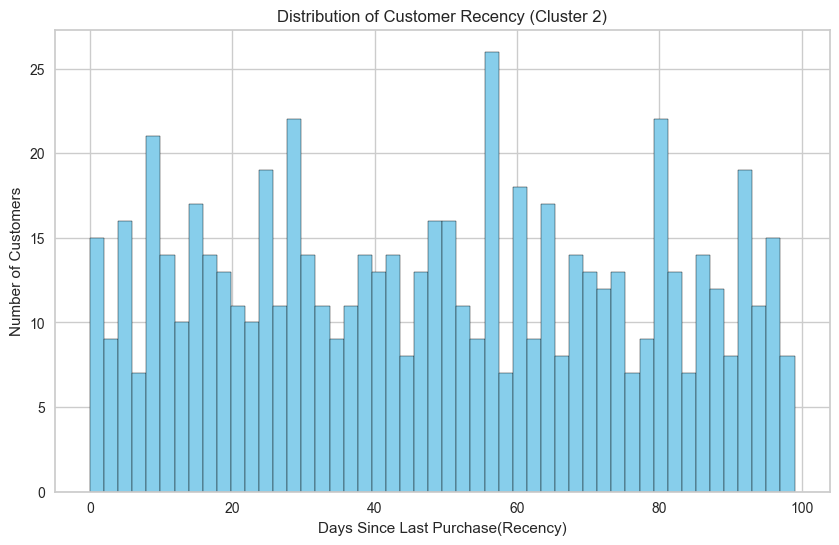

In [157]:
# sns.barplot(x=data['Recency'],hue=data['Clusters'])
import matplotlib.pyplot as plt
mask = data[data['Clusters']==2 & data['Recency']]
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(mask['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Recency (Cluster 2)')
plt.xlabel('Days Since Last Purchase(Recency)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

Distribution: The y-axis shows the number of customers, and the x-axis shows the number of days since their last purchase (recency). The higher the bar in the graph, the more customers in cluster 2 fall within that range of recency.

Recency Pattern: The graph seems to show that a higher number of customers in cluster 2 tend to have made a purchase between 0 and 20 days ago. This indicates a tendency towards frequent purchases. There's a gradual decline in the number of customers as we move towards higher recency values (days since last purchase), suggesting a decrease in purchase frequency over time.

#### FUTURE COURSE OF ACTION

# For Cluster 3:
for the given cluster they tend to spend

# Income Analysis for Cluster 3

In [158]:
import pandas as pd
import scipy 
from scipy import stats as st
# Assuming 'data' is a pandas DataFrame
median_income = data.loc[data['Clusters'] ==3,'Income'].median()
min_income = data.loc[data['Clusters'] ==3,'Income'].min()
mean_income = data.loc[data['Clusters']==3,'Income'].mean()
max_income = data.loc[data['Clusters']==3,'Income'].max()
mode_income = st.mode(data.loc[data['Clusters']==3,'Income'])
print(median_income)
print(min_income)
print(mean_income)
print(max_income)

41120.0
5648.0
41573.89244851258
162397.0


In [159]:
mask = (data['Clusters']==3)
check = data.loc[mask,'Income']
Q1=check.quantile(0.25)
Q2=check.quantile(0.75)
print('Lower Quartile', Q1)
print('Upper Quartile:',Q2)
IQR = Q1-Q2
lw =  check.min() - 1.5 * IQR
up =  check.max() +  1.5 * IQR
print('Lower whisker value:', lw)
print('Upper whisker value:', up)

Lower Quartile 34213.0
Upper Quartile: 48920.0
Lower whisker value: 27708.5
Upper whisker value: 140336.5


#### From above given Income Analysis chart and above mentioned analysis, we can say that majority of customers lying in cluster 2 have an income ranging from 22374 to 36692.5

# Amount Spent Analysis

In [160]:
import scipy
from scipy import stats as st
spent_usually = data.loc[data['Clusters']==2,'Spent'].value_counts()
print('Maximum Occuring frequency for various spent amounts:',max(spent_usually))
print('the maximum value with maximum frequency:',max(spent_usually.index))
print('the minimum value with maximum frequency:',min(spent_usually.index))
print('The median value of spent amount',np.median(data.loc[data['Clusters']==3, 'Spent']))
print('The mean value of spent amount',np.mean(data.loc[data['Clusters']==3,'Spent']))
print('The mode value of spent amount',st.mode(data.loc[data['Clusters']==3,'Spent']))

Maximum Occuring frequency for various spent amounts: 13
the maximum value with maximum frequency: 928
the minimum value with maximum frequency: 5
The median value of spent amount 67.0
The mean value of spent amount 99.59725400457666
The mode value of spent amount ModeResult(mode=22, count=9)


In [161]:
A = data.loc[data['Clusters']==3,'Spent']
Q1 =  A.quantile(0.25)
Q2 =  A.quantile(0.75)
print('Lower Quartile value:',Q1, end = '\n')
print('Upper Quartile Value :', Q2)
IQR = Q2 - Q1
print("Interquartile Range (IQR):", IQR)

Lower Quartile value: 41.0
Upper Quartile Value : 140.0
Interquartile Range (IQR): 99.0


#### Hence from the above given graph and previous calculations we can make an inference that members of cluster 2 tend to spend around 41 and above to the range of 140, with mean spent value being 99.6 and median spent value being 67

# Income vs Spent Analysis

In [163]:
mask = (data['Clusters'] == 3) & (data['Income'] <= 48920.0 ) & (data['Income'] >= 34213.0)
spent_mask = (data['Clusters']==3) & (data['Spent']>=41) & (data['Spent'] <= 140 )
# sns.histplot(data=data,x=data['mask'],y=data['spent_mask']) 

filtered_data = data[mask  & spent_mask]

# # Calculate Spent as a percentage of Income on filtered data
filtered_data['Spent_as_pct_of_Income'] = (filtered_data['Spent'] / filtered_data['Income']) * 100
print('On Average they tend to spend about this percent of their income:',np.mean(filtered_data['Spent_as_pct_of_Income']))




On Average they tend to spend about this percent of their income: 0.1852264145296519


# Customer Recency Analysis

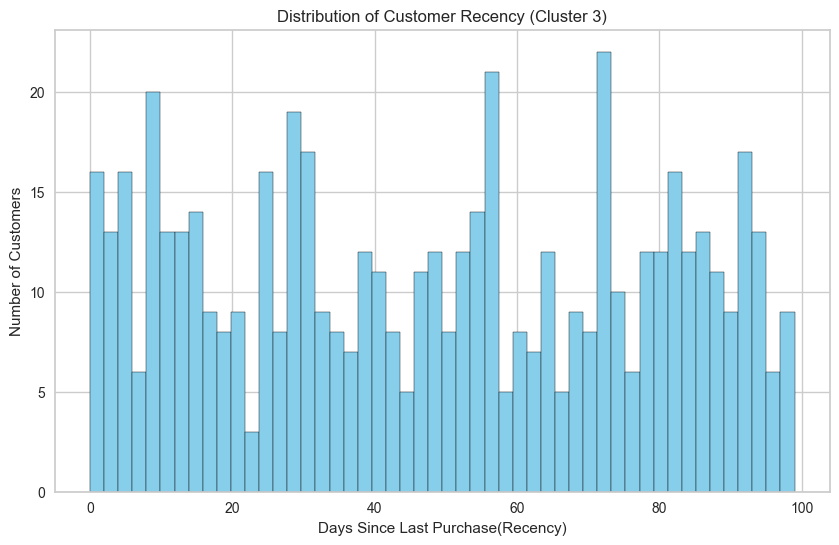

In [162]:
# sns.barplot(x=data['Recency'],hue=data['Clusters'])
import matplotlib.pyplot as plt
mask = data[data['Clusters']==3 & data['Recency']]
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(mask['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Recency (Cluster 3)')
plt.xlabel('Days Since Last Purchase(Recency)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

Distribution: The y-axis shows the number of customers, and the x-axis shows the number of days since their last purchase (recency). The higher the bar in the graph, the more customers in cluster 2 fall within that range of recency.

Recency Pattern: The graph seems to show that a higher number of customers in cluster 2 tend to have made a purchase between 0 and 20 days ago. This indicates a tendency towards frequent purchases. There's a gradual decline in the number of customers as we move towards higher recency values (days since last purchase), suggesting a decrease in purchase frequency over time.

# Overall Cluster Purchase Analysis

<Axes: xlabel='Clusters', ylabel='Wines'>

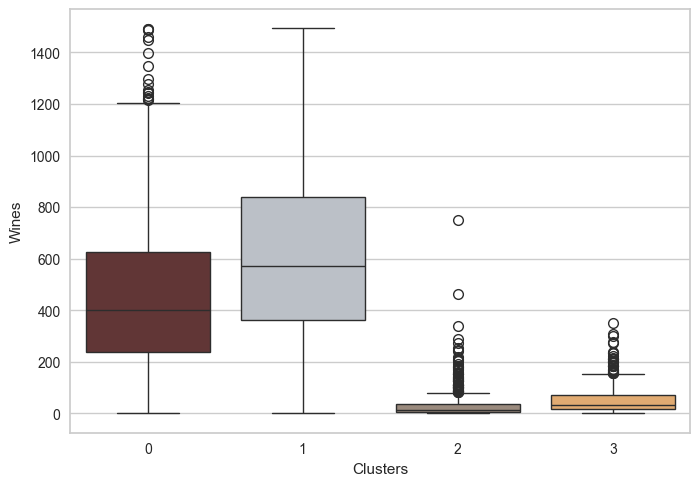

In [129]:
sns.boxplot(data = data ,x='Clusters',y='Wines',palette= pal)

#### from the above plot we can understand that majority of users in Cluster 0 are 

<Axes: xlabel='Clusters', ylabel='Gold'>

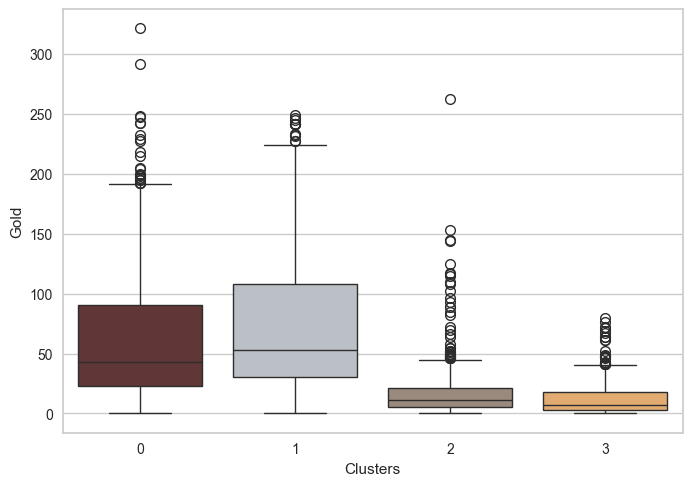

In [130]:
sns.boxplot(data = data ,x='Clusters',y='Gold',palette= pal)

<Axes: xlabel='Clusters', ylabel='Fish'>

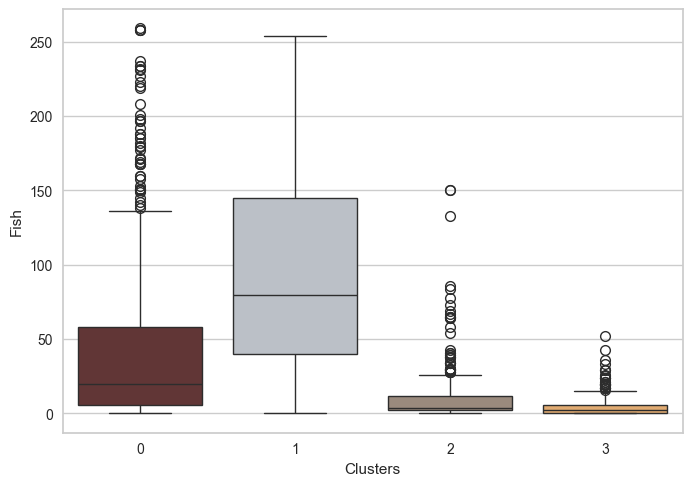

In [132]:
sns.boxplot(data = data ,x='Clusters',y='Fish',palette= pal)

<Axes: xlabel='Clusters', ylabel='Meat'>

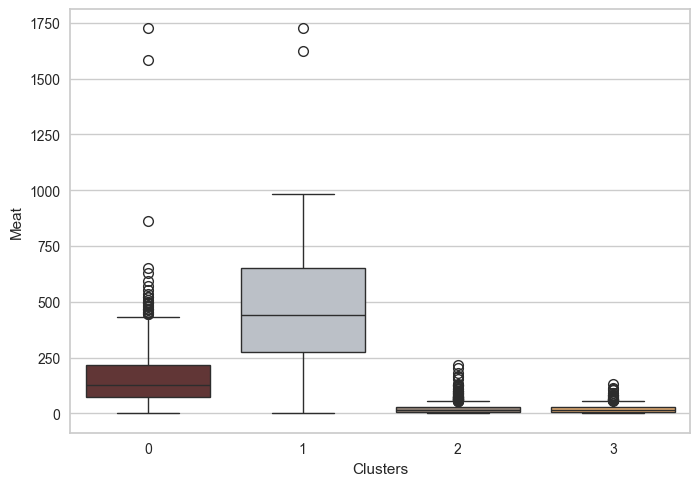

In [133]:
sns.boxplot(data = data ,x='Clusters',y='Meat',palette= pal)

<Axes: xlabel='Clusters', ylabel='Sweets'>

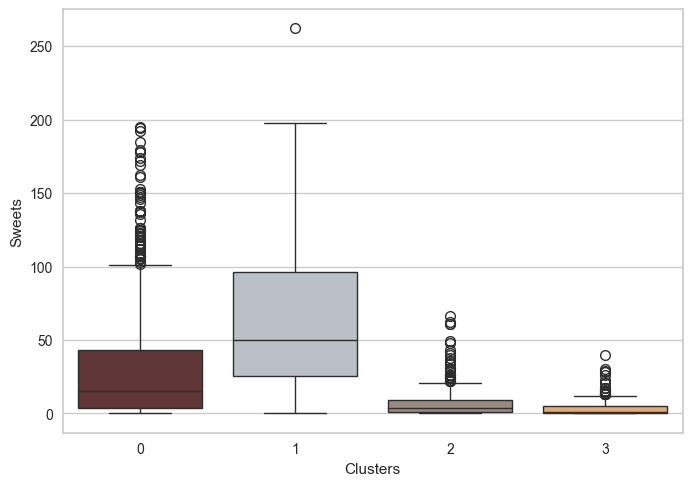

In [134]:
sns.boxplot(data = data ,x='Clusters',y='Sweets',palette= pal)

# Medium of Purchase Analysis

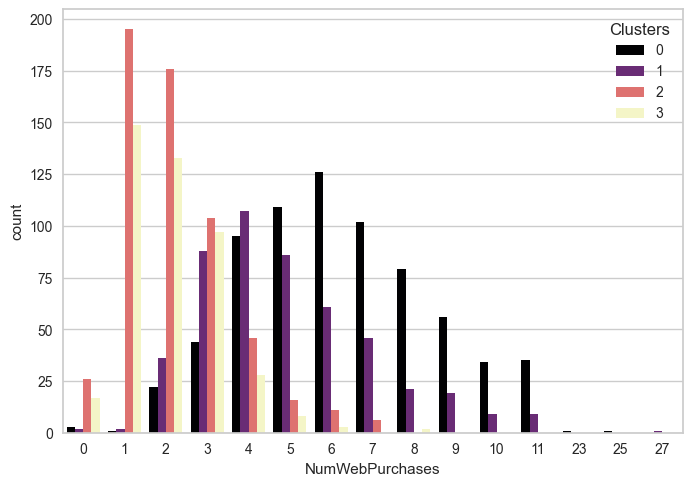

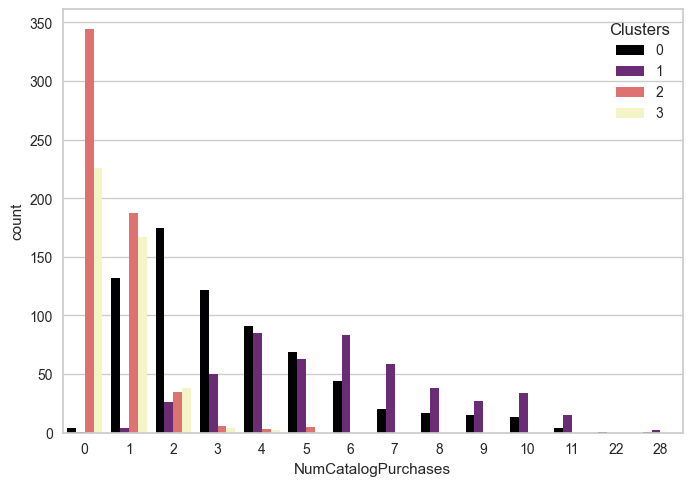

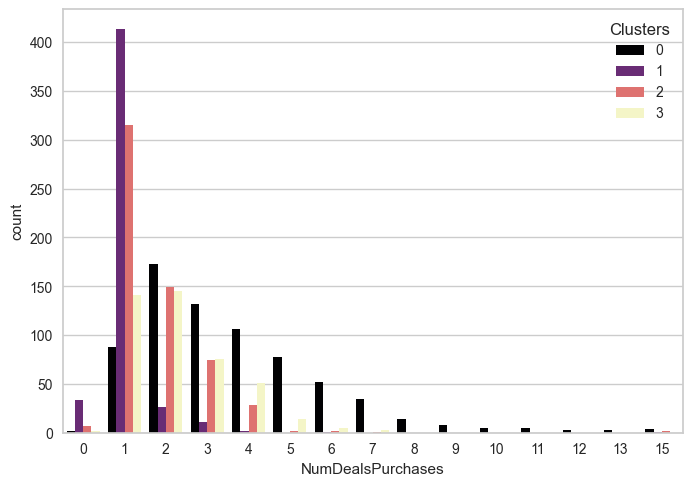

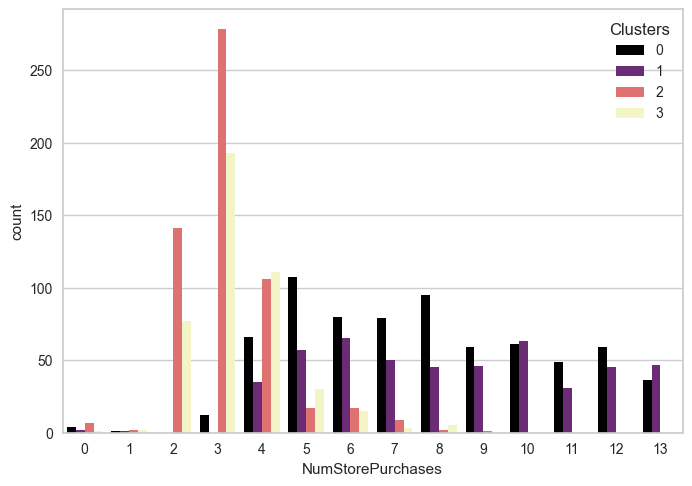

In [190]:

sns.countplot(x=data['NumWebPurchases'], hue = data['Clusters'], palette='magma')
plt.show()
sns.countplot(x=data['NumCatalogPurchases'], hue = data['Clusters'], palette='magma')
plt.show()
sns.countplot(x=data['NumDealsPurchases'], hue = data['Clusters'], palette='magma')
plt.show()
sns.countplot(x=data['NumStorePurchases'], hue = data['Clusters'], palette='magma')
plt.show()

<Axes: xlabel='NumDealsPurchases', ylabel='count'>

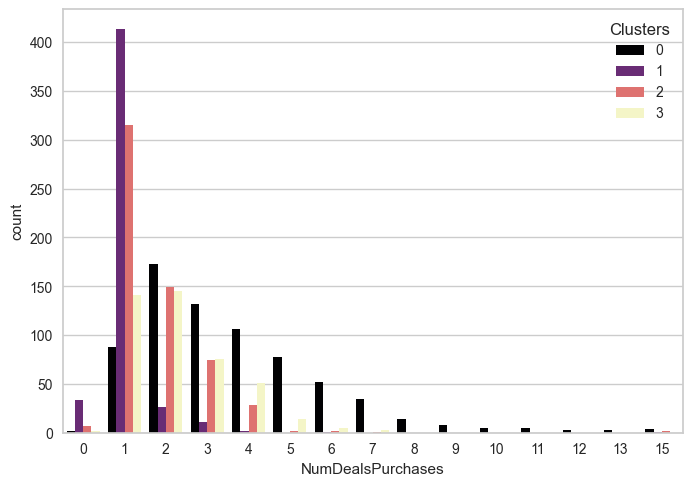

In [185]:

sns.countplot(x=data['NumDealsPurchases'], hue = data['Clusters'], palette='magma')

<Axes: xlabel='NumStorePurchases', ylabel='count'>

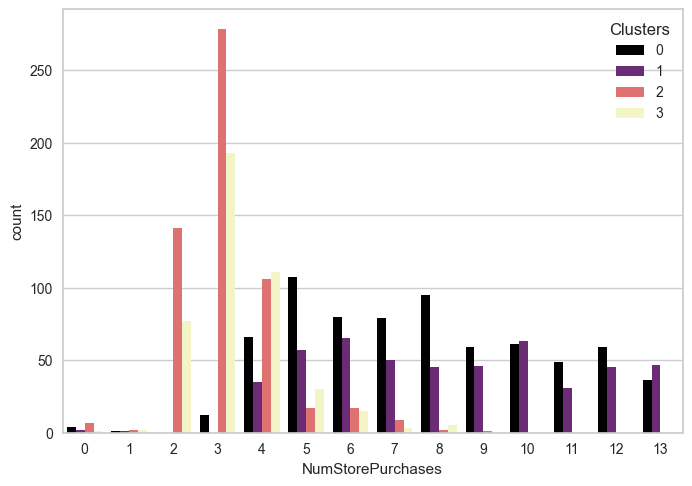

In [186]:
sns.countplot(x=data['NumStorePurchases'], hue = data['Clusters'], palette='magma')

<Axes: xlabel='NumCatalogPurchases', ylabel='count'>

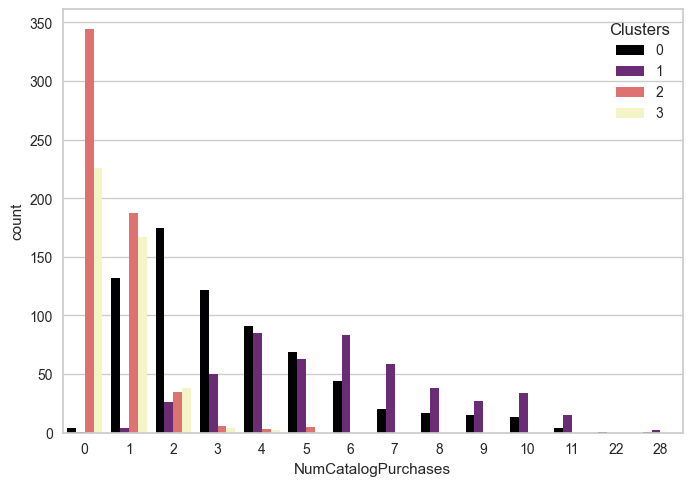

In [188]:
sns.countplot(x=data['NumCatalogPurchases'], hue = data['Clusters'], palette='magma')

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
cluster_purchases = data.groupby('Clusters')[['NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumCatalogPurchases']].sum()
print(cluster_purchases)

          NumWebPurchases  NumStorePurchases  NumDealsPurchases  \
Clusters                                                          
0                    4481               5485               2625   
1                    2439               4062                527   
2                    1231               1817               1006   
3                     892               1480                984   

          NumCatalogPurchases  
Clusters                       
0                        2456  
1                        2880  
2                         312  
3                         263  


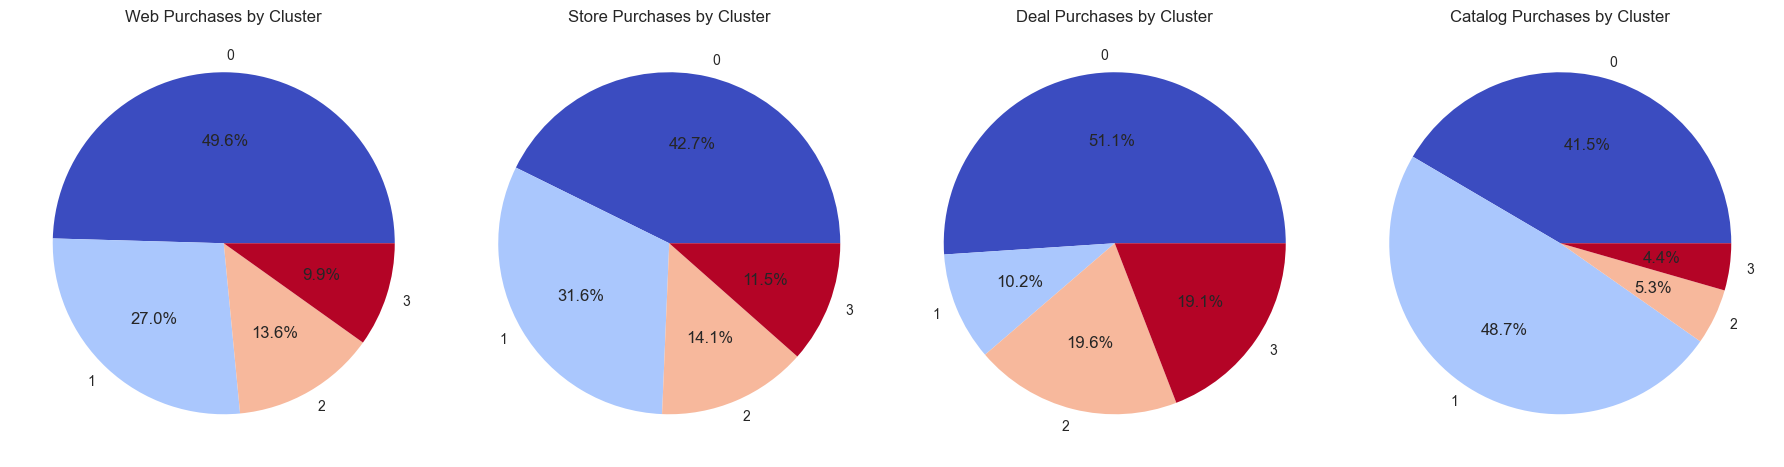

In [218]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(cluster_purchases.index)))

fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].pie(cluster_purchases['NumWebPurchases'], labels=cluster_purchases.index, colors=colors, autopct='%1.1f%%')
axes[0].set_title('Web Purchases by Cluster')

axes[1].pie(cluster_purchases['NumStorePurchases'], labels=cluster_purchases.index, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Store Purchases by Cluster')

axes[2].pie(cluster_purchases['NumDealsPurchases'], labels=cluster_purchases.index, colors=colors, autopct='%1.1f%%')
axes[2].set_title('Deal Purchases by Cluster')

axes[3].pie(cluster_purchases['NumCatalogPurchases'], labels=cluster_purchases.index, colors=colors, autopct='%1.1f%%')
axes[3].set_title('Catalog Purchases by Cluster')

plt.tight_layout()
plt.show()


In [ ]:
# Exclude the 'Phone' column from the feature set
X = data.drop(['Churn?', 'Phone'], axis=1)

# Splitting data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model before feature selection
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred)

# Feature selection using Variance Threshold
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_reduced = selector.fit_transform(X_train)
X_test_reduced = selector.transform(X_test)

# Model after feature selection
model.fit(X_train_reduced, y_train)
y_pred_reduced = model.predict(X_test_reduced)
accuracy_after = accuracy_score(y_test, y_pred_reduced)

print('Accuracy before feature selection:', accuracy_before)
print('Accuracy after feature selection:', accuracy_after)